## Library

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

## A and D

In [ ]:
def calculate_adjacency_matrix(graph, directed=False):
    G = list(set(list(graph.u.unique()) + list(graph.v.unique())))
    num_nodes_G = len(G)

    am_G = [[0] * num_nodes_G for _ in range(num_nodes_G)]

    for i in range(num_nodes_G):
        neighbors = list(graph[graph['u'] == G[i]].v)
        if not directed:
            neighbors += list(graph[graph['v'] == G[i]].u)
        for j in range(num_nodes_G):
            if G[j] in neighbors:
                if not directed:
                    am_G[j][i] = 1
                am_G[i][j] = 1

    return G, num_nodes_G, am_G

In [ ]:
def log_log(adjacency, title, directed=False):
    in_degrees = np.sum(adjacency, axis=0)
    
    out_degrees = np.sum(adjacency, axis=1)
    
    num_edges_G = sum(out_degrees)
    if not directed:
        num_edges_G /= 2

    in_hist = np.bincount(in_degrees)
    out_hist = np.bincount(out_degrees)
    
    in_hist = in_hist[in_hist > 0]
    out_hist = out_hist[out_hist > 0]
    
    plt.loglog(range(len(in_hist)), in_hist, 'ro', label='In-Degree')

    plt.loglog(range(len(out_hist)), out_hist, 'bs', label='Out-Degree')
    
    plt.xlabel('Degree (log scale)')
    plt.ylabel('Frequency (log scale)')
    
    plt.title(f'Log-Log Degree Distribution Plot for {"Directed" if directed else "Undirected"} Graph{title}')
    plt.grid()
    plt.legend()
    plt.show()

    print(f'Number of Nodes : {len(adjacency)}\nNumber of Edges : {num_edges_G}')
    
    return num_edges_G

### Graph 1

In [ ]:
graph1 = pd.read_csv('./Q1/graph1.txt', sep=' ', header=None, names=['u', 'v'])

graph1

,u,v
0,0,6205
1,0,9039
2,0,9219
3,0,8268
4,0,6208
...,...,...
91718,500,6470
91719,500,6997
91720,500,8590
91721,500,6208


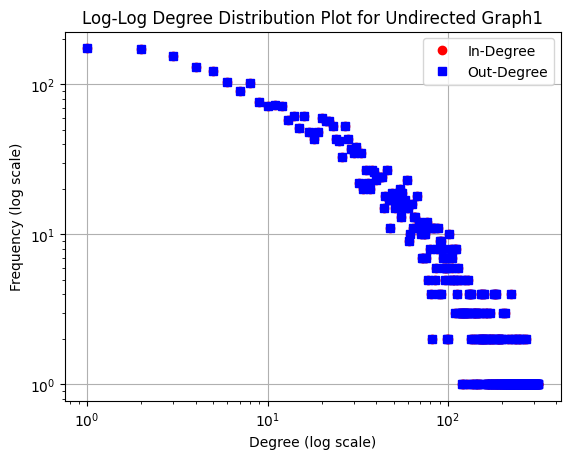

Number of Nodes : 3718
Number of Edges : 91723.0


In [ ]:
# Undirected
G1, num_nodes_G1, am_G1 = calculate_adjacency_matrix(graph1, False)
num_edges_G1 = log_log(am_G1, 1, False)

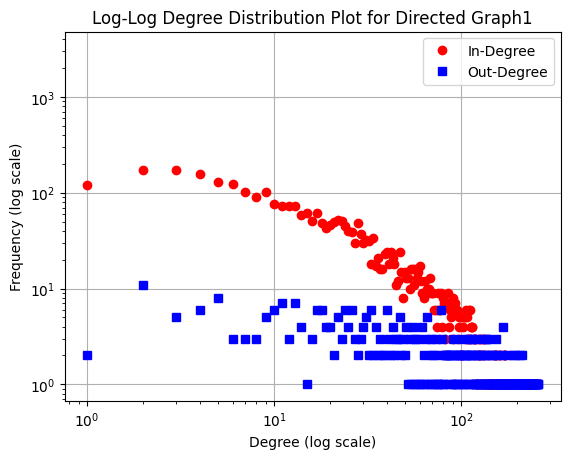

Number of Nodes : 3718
Number of Edges : 91723


In [ ]:
# Directed
d_G1, d_num_nodes_G1, d_am_G1 = calculate_adjacency_matrix(graph1, True)
d_num_edges_G1 = log_log(d_am_G1, 1, True)

### Graph 2

In [ ]:
graph2 = pd.read_csv('./Q1/graph2.txt', sep=' ', header=None, names=['u', 'v'])

graph2

,u,v
0,0,10746
1,0,10759
2,0,10734
3,0,10741
4,0,10762
...,...,...
28762,500,11025
28763,500,11207
28764,500,13498
28765,500,15621


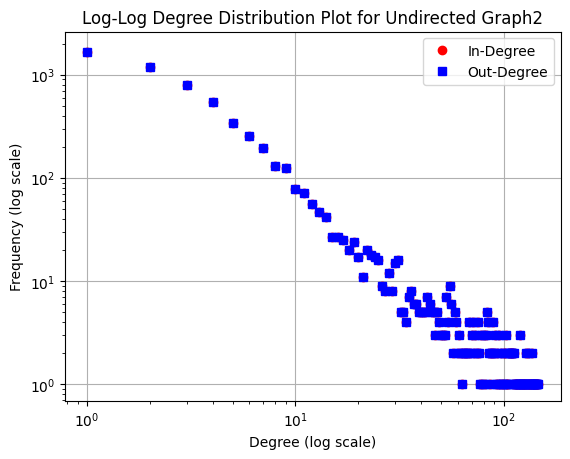

Number of Nodes : 7886
Number of Edges : 28767.0


In [ ]:
# Undirected
G2, num_nodes_G2, am_G2 = calculate_adjacency_matrix(graph2, False)
num_edges_G2 = log_log(am_G2, 2, False)

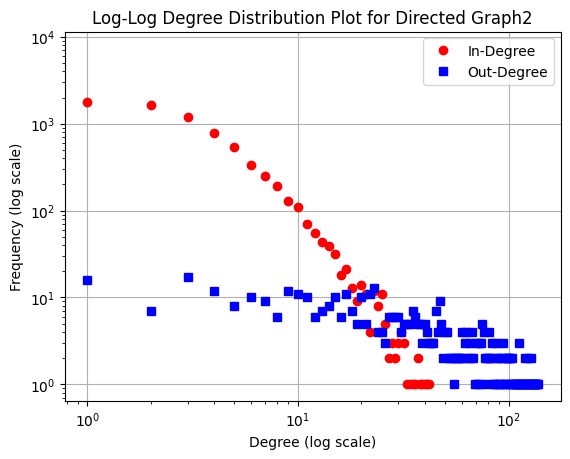

Number of Nodes : 7886
Number of Edges : 28767


In [ ]:
# Directed
d_G2, d_num_nodes_G2, d_am_G2 = calculate_adjacency_matrix(graph2, True)
d_num_edges_G2 = log_log(d_am_G2, 2, True)

### Graph 3

In [ ]:
graph3 = pd.read_csv('./Q1/graph3.txt', sep='\t', header=None, names=['u', 'v'])

graph3

,u,v
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960
...,...,...
5424,853116,19621
5425,853116,853155
5426,853118,1140289
5427,853155,853118


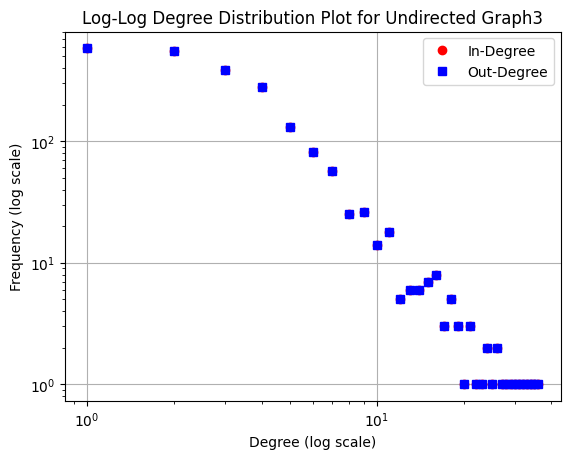

Number of Nodes : 2708
Number of Edges : 5278.0


In [ ]:
# Undirected
G3, num_nodes_G3, am_G3 = calculate_adjacency_matrix(graph3, False)
num_edges_G3 = log_log(am_G3, 3, False)

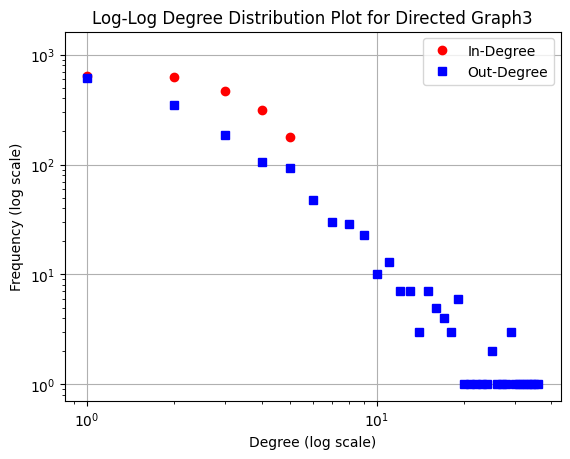

Number of Nodes : 2708
Number of Edges : 5429


In [ ]:
# Directed
d_G3, d_num_nodes_G3, d_am_G3 = calculate_adjacency_matrix(graph3, True)
d_num_edges_G3 = log_log(d_am_G3, 3, True)

## B and D

In [ ]:
# Erdos - Renyi

def erdosRenyi(num_nodes, num_edges, edge_probability, title):
    graph = [[0] * num_nodes for _ in range(num_nodes)]

    e = 0
    combinations_list = list(combinations(range(num_nodes), 2))
    random.shuffle(combinations_list)
    for i, j in combinations_list:
        if random.random() < edge_probability:
            graph[i][j] = 1
            graph[j][i] = 1
            e += 1
            if e == num_edges:
                break

    # Save in txt file
    file_name = f'./output/erdos_renyi_{str(title)}.txt'
    with open(file_name, "w") as file:
        for i in range(len(graph)):
            for j in range(len(graph[i])):
                if graph[i][j] == 1: 
                    file.write(f"{i} {j}\n")
    print("Graph edges have been written to", file_name)

    # log-log plot
    degrees = [sum(row) for row in graph]

    degree_counts = np.bincount(degrees)
    nonzero_degrees = np.nonzero(degree_counts)[0]

    plt.loglog(nonzero_degrees, degree_counts[nonzero_degrees], 'ro')
    plt.title(f"Log-Log Plot of Erdős-Rényi Degree Distribution of graph{str(title)}")
    plt.xlabel("Log(Degree)")
    plt.ylabel("Log(Count)")
    plt.grid()
    plt.show()

    return graph

Graph edges have been written to ./output/erdos_renyi_1.txt


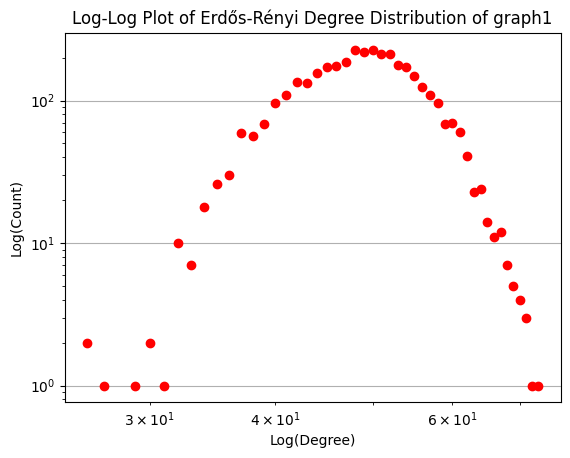

Graph edges have been written to ./output/erdos_renyi_2.txt


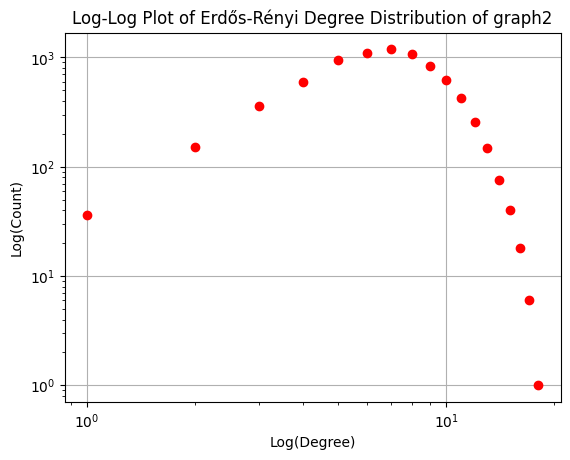

Graph edges have been written to ./output/erdos_renyi_3.txt


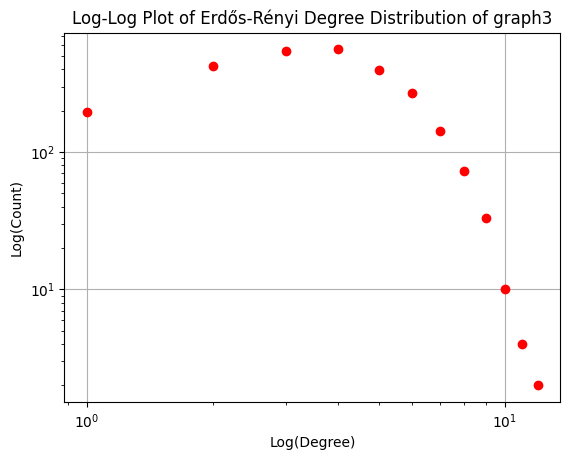

In [ ]:
er_G1 = erdosRenyi(num_nodes_G1, num_edges_G1, 0.4, 1)
er_G2 = erdosRenyi(num_nodes_G2, num_edges_G2, 0.4, 2)
er_G3 = erdosRenyi(num_nodes_G3, num_edges_G3, 0.4, 3)

## C and D

In [ ]:
# Small - World

def smallWorld(num_nodes, r, p_rewire, title):
    graph = {node: [] for node in range(num_nodes)}
    
    for node in range(num_nodes):
        for i in range(1, r // 2 + 1):
            neighbor = (node + i) % num_nodes
            graph[node].append(neighbor)
            graph[neighbor].append(node)

    for node in range(num_nodes):
        for neighbor in graph[node]:
            if random.random() < p_rewire:
                new_neighbor = random.choice(range(num_nodes))
                while new_neighbor == node or new_neighbor in graph[node]:
                    new_neighbor = random.choice(range(num_nodes))
                graph[node].remove(neighbor)
                graph[neighbor].remove(node)
                graph[node].append(new_neighbor)
                graph[new_neighbor].append(node)

    # Save in txt file
    file_name = f'./output/small_world_{str(title)}.txt'
    with open(file_name, "w") as file:
        for node, neighbors in graph.items():
            for neighbor in neighbors:
                file.write(f"{node} {neighbor}\n")
    print("Graph edges have been written to", file_name)

    degrees = [len(neighbors) for neighbors in graph.values()]

    degree_counts = np.bincount(degrees)
    nonzero_degrees = np.nonzero(degree_counts)[0]

    plt.loglog(nonzero_degrees, degree_counts[nonzero_degrees], 'ro')
    plt.title(f"Log-Log Plot of Small-World Degree Distribution of graph{str(title)}")
    plt.xlabel("Log(Degree)")
    plt.ylabel("Log(Count)")
    plt.grid()
    plt.show()


    return graph

Graph edges have been written to ./output/small_world_1.txt


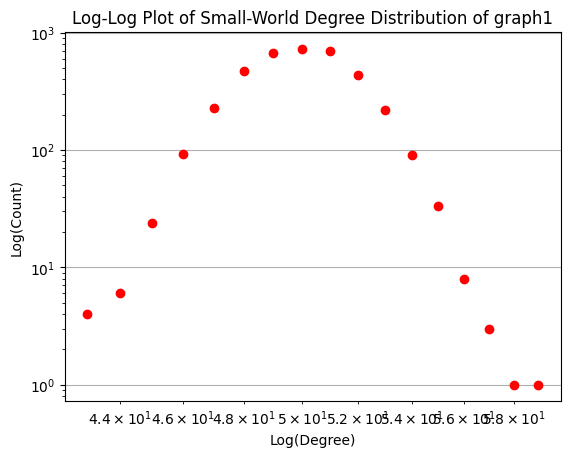

Graph edges have been written to ./output/small_world_2.txt


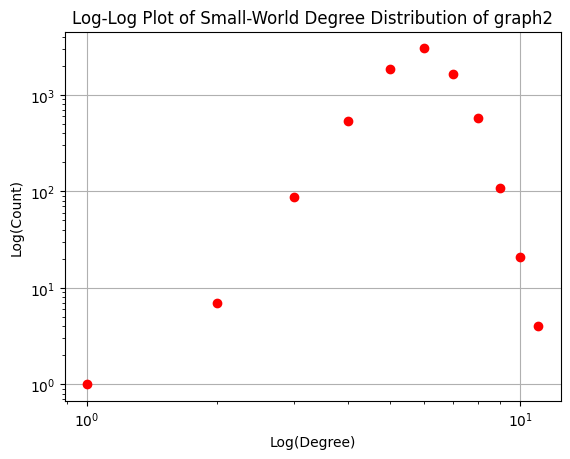

Graph edges have been written to ./output/small_world_3.txt


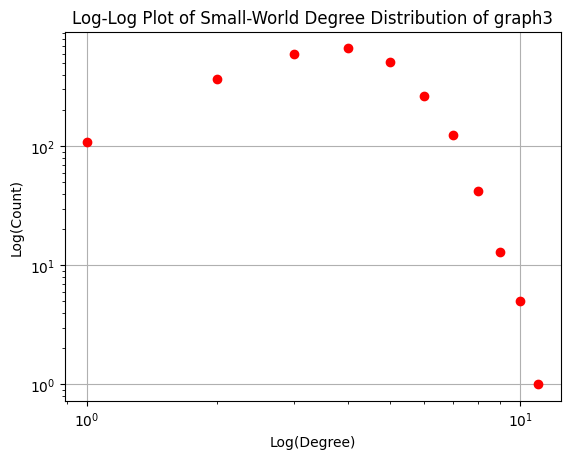

In [ ]:
sw_G1 = smallWorld(num_nodes_G1, 50, num_nodes_G1/num_edges_G1, 1)
sw_G2 = smallWorld(num_nodes_G2, 7, num_nodes_G1/num_edges_G2, 2)
sw_G3 = smallWorld(num_nodes_G3, 4, num_nodes_G1/num_edges_G3, 3)

## E

In [ ]:
def adjacency_matrix_to_list(adj_matrix):
    num_vertices = len(adj_matrix)

    adj_list = {}

    for i in range(num_vertices):
        adj_list[i] = []
        for j in range(num_vertices):
            if adj_matrix[i][j] == 1:
                adj_list[i].append(j)

    return adj_list

In [ ]:
# Undirected
al_G1 = adjacency_matrix_to_list(am_G1)
al_G2 = adjacency_matrix_to_list(am_G2)
al_G3 = adjacency_matrix_to_list(am_G3)

# Directed
d_al_G1 = adjacency_matrix_to_list(d_am_G1)
d_al_G2 = adjacency_matrix_to_list(d_am_G2)
d_al_G3 = adjacency_matrix_to_list(d_am_G3)

In [ ]:
def dfs(graph, node, visited, stack):
    visited[node] = True
    for neighbor in graph[node]:
        if not visited[neighbor]:
            dfs(graph, neighbor, visited, stack)
    stack.append(node)

def transpose(graph):
    transposed_graph = {node: [] for node in graph}
    for node in graph:
        for neighbor in graph[node]:
            transposed_graph[neighbor].append(node)
    return transposed_graph

def dfs_scc(graph, node, visited, component):
    visited[node] = True
    component.append(node)
    for neighbor in graph[node]:
        if not visited[neighbor]:
            dfs_scc(graph, neighbor, visited, component)

def kosaraju(graph):
    stack = []
    visited = {node: False for node in graph}

    # First DFS to fill the stack
    for node in graph:
        if not visited[node]:
            dfs(graph, node, visited, stack)

    # Transpose the graph
    transposed_graph = transpose(graph)

    # Reset visited status
    visited = {node: False for node in graph}

    # Second DFS to find strongly connected components
    components = []
    while stack:
        node = stack.pop()
        if not visited[node]:
            component = []
            dfs_scc(transposed_graph, node, visited, component)
            components.append(component)

    return components

def find_largest_scc(graph):
    strongly_connected_components = kosaraju(graph)
    largest_scc = max(strongly_connected_components, key=len)
    return largest_scc

# Find the largest strongly connected component
largest_scc1 = find_largest_scc(d_al_G1)
print("Largest strongly connected component for Directed Graph1 :", largest_scc1)
largest_scc2 = find_largest_scc(d_al_G2)
print("Largest strongly connected component for Directed Graph2 :", largest_scc2)
largest_scc3 = find_largest_scc(d_al_G3)
print("Largest strongly connected component for Directed Graph3 :", largest_scc3)

Largest strongly connected component for Directed Graph3 : [13, 1206, 456, 1777, 947, 183, 731, 2035, 1084, 2495, 2036, 2038, 886]


In [ ]:
from collections import deque

def bfs_shortest_path(adj_list, start):
    shortest_distances = {vertex: float('inf') for vertex in adj_list}
    shortest_distances[start] = 0

    queue = deque([start])

    while queue:
        current_vertex = queue.popleft()
        for neighbor in adj_list[current_vertex]:
            if neighbor in shortest_distances and shortest_distances[neighbor] == float('inf'):
                shortest_distances[neighbor] = shortest_distances[current_vertex] + 1
                queue.append(neighbor)

    return shortest_distances

In [ ]:
def dfs(graph, node, visited, component):
    visited[node] = True
    component.append(node)
    for neighbor in graph[node]:
        if not visited[neighbor]:
            dfs(graph, neighbor, visited, component)

def find_largest_component(graph):
    visited = {node: False for node in graph}
    components = []

    for node in graph:
        if not visited[node]:
            component = []
            dfs(graph, node, visited, component)
            components.append(component)

    largest_component = max(components, key=len)

    return largest_component

In [ ]:
def average_shortest_path(graph):
    total_shortest_paths = 0
    total_nodes = len(graph)

    for node in graph:
        distances = bfs_shortest_path(graph, node)
        # total_shortest_paths += sum(distances.values())
        for distance in distances.values():
            if distance != float('inf'):
                total_shortest_paths += distance

    # Exclude self-paths (distance from a node to itself)
    # total_shortest_paths -= total_nodes

    # Calculate average shortest path
    average_shortest_path = total_shortest_paths / (total_nodes * (total_nodes - 1))

    return average_shortest_path

In [ ]:
# Undirected

def calculate_avg_path_length(graph):
    largest_component = find_largest_component(graph)
    # Build a subgraph containing only nodes from the largest component
    largest_component_graph = {node: graph[node] for node in largest_component}
    return average_shortest_path(largest_component_graph)

average_path_length1 = calculate_avg_path_length(al_G1)
print(f'Average Shortest Path Length of Undirected Graph1 : {average_path_length1}')
average_path_length2 = calculate_avg_path_length(al_G2)
print(f'Average Shortest Path Length of Undirected Graph2 : {average_path_length2}')
average_path_length3 = calculate_avg_path_length(al_G3)
print(f'Average Shortest Path Length of Undirected Graph3 : {average_path_length3}')

Average Shortest Path Length of Undirected Graph1 : 2.66217297116906
Average Shortest Path Length of Undirected Graph2 : 3.993040941211889
Average Shortest Path Length of Undirected Graph3 : 6.310998681298742


In [ ]:
# Directed

d_average_path_length1 = average_shortest_path(d_al_G1)
print(f'Average Shortest Path Length of Directed Graph1 : {d_average_path_length1}')
d_average_path_length2 = average_shortest_path(d_al_G2)
print(f'Average Shortest Path Length of Directed Graph2 : {d_average_path_length2}')
d_average_path_length3 = average_shortest_path(d_al_G3)
print(f'Average Shortest Path Length of Directed Graph3 : {d_average_path_length3}')

Average Shortest Path Length of Directed Graph1 : 0.0066370685666643945
Average Shortest Path Length of Directed Graph2 : 0.00046263246185216056
Average Shortest Path Length of Directed Graph3 : 0.030970774931669574


In [ ]:
def diameter_of_graph(adj_list):
    max_diameter = 0

    for vertex in adj_list:
        shortest_distances = bfs_shortest_path(adj_list, vertex)
        # max_distance = max(shortest_distances.values())
        max_distance = max([d for d in list(shortest_distances.values()) if d != float('inf')])
        if max_distance == float('inf'):
            # return float('inf')
            continue
        max_diameter = max(max_diameter, max_distance)

    return max_diameter

In [ ]:
# Undirected

def calculate_diameter(graph):
    largest_component = find_largest_component(graph)
    # Build a subgraph containing only nodes from the largest component
    largest_component_graph = {node: graph[node] for node in largest_component}
    return diameter_of_graph(largest_component_graph)

diameter1 = calculate_diameter(al_G1)
print(f'Diameter of Undirected Graph1 : {diameter1}')
diameter2 = calculate_diameter(al_G2)
print(f'Diameter of Undirected Graph2 : {diameter2}')
diameter3 = calculate_diameter(al_G3)
print(f'Diameter of Undirected Graph3 : {diameter3}')

Diameter of Undirected Graph1 : 6
Diameter of Undirected Graph2 : 8
Diameter of Undirected Graph3 : 19


In [ ]:
# Directed

d_diameter1 = diameter_of_graph(d_al_G1)
print(f'Diameter of Directed Graph1 : {d_diameter1}')
d_diameter2 = diameter_of_graph(d_al_G2)
print(f'Diameter of Directed Graph2 : {d_diameter2}')
d_diameter3 = diameter_of_graph(d_al_G3)
print(f'Diameter of Directed Graph3 : {d_diameter3}')

Diameter of Directed Graph1 : 1
Diameter of Directed Graph2 : 1
Diameter of Directed Graph3 : 15


In [ ]:
largest_scc3 = {node: d_al_G3[node] for node in largest_scc3}
d_average_path_length3 = average_shortest_path(largest_scc3)
print(f'Average Shortest Path Length of Directed Graph3 : {d_average_path_length3}')
d_diameter3 = diameter_of_graph(largest_scc3)
print(f'Diameter of Directed Graph3 : {d_diameter3}')

Average Shortest Path Length of Directed Graph3 : 3.75
Diameter of Directed Graph3 : 9


In [ ]:
def clustering_coefficient(adj_list, node):
    neighbors = adj_list[node]

    if len(neighbors) < 2:
        return 0.0

    num_triangles = 0
    num_possible_triangles = (len(neighbors) * (len(neighbors) - 1)) / 2

    for i in range(len(neighbors)):
        for j in range(i + 1, len(neighbors)):
            if neighbors[j] in adj_list[neighbors[i]]:
                num_triangles += 1

    return num_triangles / num_possible_triangles

def average_clustering_coefficient(adj_list):
    total_coefficient = 0
    num_nodes = len(adj_list)

    for node in adj_list:
        total_coefficient += clustering_coefficient(adj_list, int(node))

    return total_coefficient / num_nodes if num_nodes > 0 else 0.0

In [ ]:
avg_clustering_coeff1 = average_clustering_coefficient(al_G1)
print(f'Clustering Coefficient of Undirected Graph1 : {avg_clustering_coeff1}')
avg_clustering_coeff2 = average_clustering_coefficient(al_G2)
print(f'Clustering Coefficient of Undirected Graph2 : {avg_clustering_coeff2}')
avg_clustering_coeff3 = average_clustering_coefficient(al_G3)
print(f'Clustering Coefficient of Undirected Graph3 : {avg_clustering_coeff3}')

d_avg_clustering_coeff1 = average_clustering_coefficient(d_al_G1)
print(f'Clustering Coefficient of Directed Graph1 : {d_avg_clustering_coeff1}')
d_avg_clustering_coeff2 = average_clustering_coefficient(d_al_G2)
print(f'Clustering Coefficient of Directed Graph2 : {d_avg_clustering_coeff2}')
d_avg_clustering_coeff3 = average_clustering_coefficient(d_al_G3)
print(f'Clustering Coefficient of Directed Graph3 : {d_avg_clustering_coeff3}')

Clustering Coefficient of Undirected Graph1 : 0.0
Clustering Coefficient of Undirected Graph2 : 0.0
Clustering Coefficient of Undirected Graph3 : 0.24067329850193753
Clustering Coefficient of Directed Graph1 : 0.0
Clustering Coefficient of Directed Graph2 : 0.0
Clustering Coefficient of Directed Graph3 : 0.04318664481819977


In [ ]:
al_er_G1 = adjacency_matrix_to_list(er_G1)
al_er_G2 = adjacency_matrix_to_list(er_G2)
al_er_G3 = adjacency_matrix_to_list(er_G3)

avg_clustering_coeff_er1 = average_clustering_coefficient(al_er_G1)
print(f'Clustering Coefficient of Erdős-Rényi Graph1 : {avg_clustering_coeff_er1}')
avg_clustering_coeff_er2 = average_clustering_coefficient(al_er_G2)
print(f'Clustering Coefficient of Erdős-Rényi Graph2 : {avg_clustering_coeff_er2}')
avg_clustering_coeff_er3 = average_clustering_coefficient(al_er_G3)
print(f'Clustering Coefficient of Erdős-Rényi Graph3 : {avg_clustering_coeff_er3}')

avg_clustering_coeff_sw1 = average_clustering_coefficient(sw_G1)
print(f'Clustering Coefficient of Small-World Graph1 : {avg_clustering_coeff_sw1}')
avg_clustering_coeff_sw2 = average_clustering_coefficient(sw_G2)
print(f'Clustering Coefficient of Small-World Graph2 : {avg_clustering_coeff_sw2}')
avg_clustering_coeff_sw3 = average_clustering_coefficient(sw_G3)
print(f'Clustering Coefficient of Small-World Graph3 : {avg_clustering_coeff_sw3}')

Clustering Coefficient of Erdős-Rényi Graph1 : 0.013317869495880518
Clustering Coefficient of Erdős-Rényi Graph2 : 0.0007955523025043094
Clustering Coefficient of Erdős-Rényi Graph3 : 0.0005638789242925136
Clustering Coefficient of Small-World Graph1 : 0.5789275016588512
Clustering Coefficient of Small-World Graph2 : 0.29218153419269344
Clustering Coefficient of Small-World Graph3 : 0.003586961618719371
